## Stars with Energy Production

    1a)
    Mass = volume*row
    M_r = row*(4/3*pi*r^3)
    dM_r/dr = row*4*pi*r^2 

    1b)
    dP/dr = -G*M_r*row/r2

    1c)
    epsilon = energy/(time*mass)
    L = epsilon*M_r
      = epsilon*row*(4/3*pi*r^3)
    dL/dr = epsilon*row*4*pi*r^2

    1d)
    dT/dr = (3/4ac)*(kappa*row/T^3)*(L/4*pi*r^2)

    1e)
    M(r=0) = 0; M(r=R_0) = M_sun
    L(r=0) = 0; L(r=R_0) = L_sun
    P(r=0) = P_center
    T(r=0) = T_center

In [6]:
import numpy as np
from scipy.integrate import odeint

a,b,c,d = 1,1,1,1

def dP_dt(P, t):
    return [P[0]*(a - b*P[1]), -P[1]*(c - d*P[0])]

ts = np.linspace(0, 20, 100)
P0 = [2.0, 1.0]
Ps = odeint(dP_dt, P0, ts)
prey = Ps[:,0]
predators = Ps[:,1]

1g)


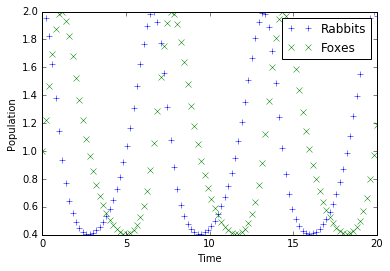

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

print '1g)'
plt.plot(ts, prey, "+", label="Rabbits")
plt.plot(ts, predators, "x", label="Foxes")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

1h)


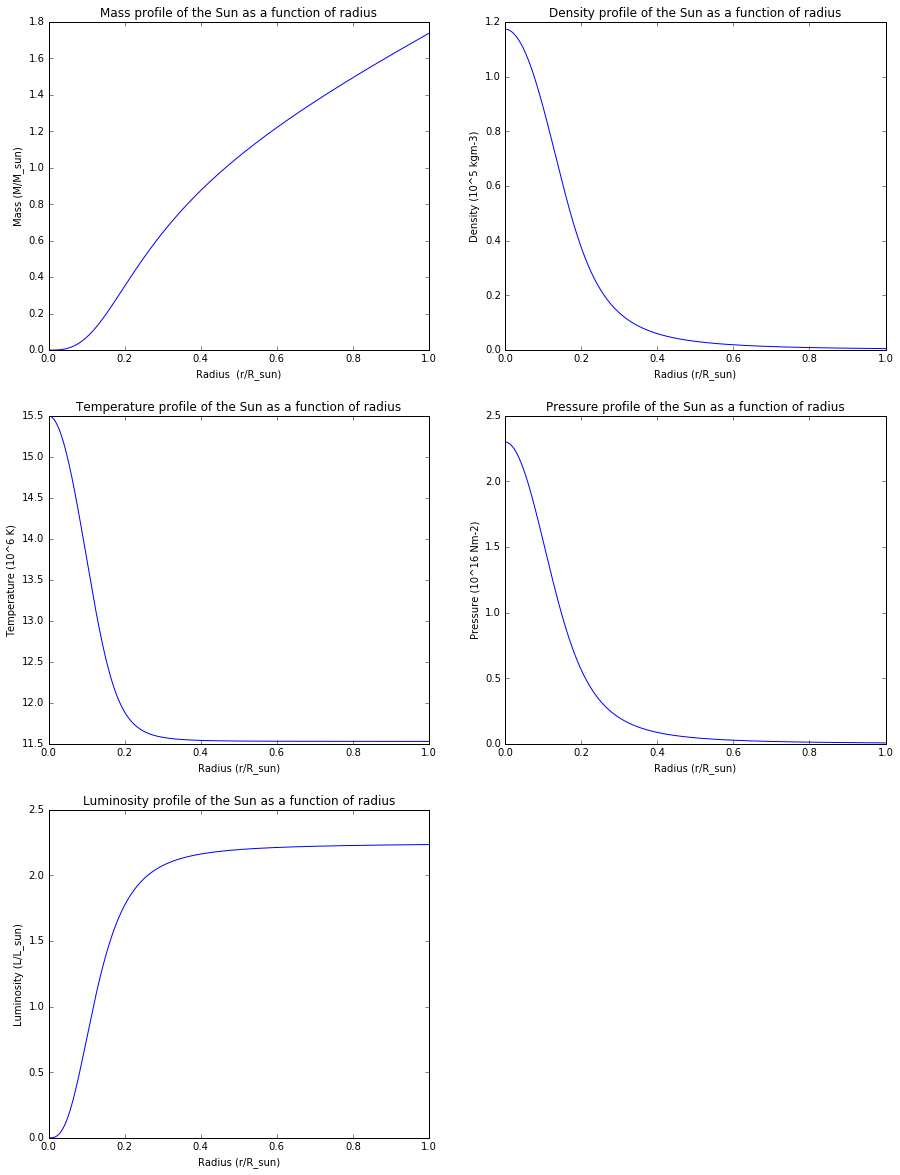

In [11]:
import numpy as np
from astropy import constants as cn
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

G = cn.G.value
kb = cn.k_B.value
mH = 1.008*cn.u.value
R = kb/mH
a = 7.565*(10**(-16))
c = cn.c.value

X=0.63
Y=0.35
Z=0.02
mu = 1.0/(2.0*X +(3.0/4.0)*Y + (1.0/2.0)*Z)

def row(y,r):
    M_r, L_r, T, P = y
    row_T= (mu*(P - (1.0/3.0)*a*(T**4.0)))/(R*T)
    #print row_T
    return row_T                                              
                                                    
def ep(y,r):
    M_r, L_r, T, P = y
    row_0 = row(y,r)
    ep_T = (1.08*(10**(-12.0)))*row_0*(0.64**2.0)*((T/(10**6.0))**4.0) + (8.24*(10**(-31.0)))*row_0*0.64*0.015*((T/(10**6.0))**(19.9))
    #print ep_T
    return ep_T                                                
                                            
def kappa(y,r):
    M_r, L_r, T, P = y
    row_0 = row(y,r)
    k_bf = (4.34*(10**21))*Z*(1+X)*(row_0/(T**(3.5)))*(0.1)
    k_ff = (3.68*(10**18))*(1-Z)*(1+X)*(row_0/(T**(3.5)))
    k_e = 0.02*(1+X)
    #k_H = (7.9*10**(-34.0))*(Z/0.02)*(row_0**(1.0/2.0))*(T**(9.0))
    k_T = (k_bf+k_ff+k_e)/3.0
    #print k_T
    return k_T

def dM_dr(y,r):
    M_r, L_r, T, P = y
    row_0 = row(y,r)
    dMr_dr=4.0*np.pi*row_0*(r**2.0)
    return dMr_dr

def dL_dr(y,r):
    M_r, L_r, T, P = y
    row_0 = row(y,r)
    ep_0 = ep(y,r)
    dLr_dr=4.0*np.pi*row_0*ep_0*(r**2.0)
    return dLr_dr

def dT_dr(y,r):
    M_r, L_r, T, P = y
    row_0 = row(y,r)
    kappa_0 = kappa(y,r)
    dTr_dr = -(3.0/(4.0*a*c))*((kappa_0*row_0)/(T**3.0))*(L_r/(4.0*np.pi*(r**2.0)))
    #print dTr_dr
    return dTr_dr

def dP_dr(y,r):
    M_r, L_r, T, P = y
    row_0 = row(y,r)
    dPr_dr=-G*M_r*row_0/(r**2.0)
    #print dPr_dr
    return dPr_dr

def f(y, r):
    M_r, L_r, T, P = y
    dMdr = dM_dr(y,r)
    dLdr = dL_dr(y,r)
    dTdr = dT_dr(y,r)
    dPdr = dP_dr(y,r)
    derivs = [dMdr, dLdr, dTdr, dPdr]
    #print r, y, derivs
    return derivs

R_s = cn.R_sun.value
M_s = cn.M_sun.value
L_s = cn.L_sun.value
M_r0 = 0.0
L_r0 = 0.0
T0 = 15.5*10**6.0
P0 = 2.3*10**16.0
y0 = [M_r0, L_r0, T0, P0]

r = np.linspace(1.0, R_s, num=10000)

psoln = odeint(f, y0, r)

print '1h)'
fig = plt.figure(1, figsize=(15,20))
ax1 = fig.add_subplot(321)
ax1.plot(r/R_s, psoln[:, 0]/M_s)
ax1.set_xlabel('Radius  (r/R_sun)')
ax1.set_ylabel('Mass (M/M_sun)')
ax1.set_title('Mass profile of the Sun as a function of radius')

ax2 = fig.add_subplot(325)
ax2.plot(r/R_s, psoln[:,1]/L_s)
ax2.set_xlabel('Radius (r/R_sun)')
ax2.set_ylabel('Luminosity (L/L_sun)')
ax2.set_title('Luminosity profile of the Sun as a function of radius')

ax3 = fig.add_subplot(323)
ax3.plot(r/R_s, psoln[:,2]/(10**6))
ax3.set_xlabel('Radius (r/R_sun)')
ax3.set_ylabel('Temperature (10^6 K)')
ax3.set_title('Temperature profile of the Sun as a function of radius')


ax4 = fig.add_subplot(324)
ax4.plot(r/R_s, psoln[:,3]/(10**16))
ax4.set_xlabel('Radius (r/R_sun)')
ax4.set_ylabel('Pressure (10^16 Nm-2)')
ax4.set_title('Pressure profile of the Sun as a function of radius')

M_r1 = psoln[:,0]
L_r1 = psoln[:,1]
T1 = psoln[:,2]
P1 = psoln[:,3]
y1 = [M_r1, L_r1, T1, P1]

ax5 = fig.add_subplot(322)
ax5.plot(r/R_s, row(y1,r)/(10**5))
ax5.set_xlabel('Radius (r/R_sun)')
ax5.set_ylabel('Density (10^5 kgm-3)')
ax5.set_title('Density profile of the Sun as a function of radius')

plt.show()

    1i)
    For the mass profile, my solution gives a final mass of 1.7 times the mass of the Sun at the radius of the Sun. It does not seem to plateau off either like in Fiugre 1.
    
    For the density profile, my soultion starts off at a little lower inital density but overall the curve is the same as in Figure 1.
    
    For the temperature profile, my solution drops quickly and then plateau around 11.5*10^6 K which makes sense as it shouldn't approach 0 at the radius of the Sun as it does in Figure 1. 
    
    For the pressure profile, my solution follow Figure 1 roughly the same. The pressure gradient is not as steep in my solution as in Figure 1.
    
    For the luminosity profile, my solution gives a final luminosity of 2.2 times the luminosity of the Sun at the radius of the Sun. However, the curve follows the shape seen in Figure 1.
    
    The graphs are probably different because of how kappa is calculated or even the composition that makes up mu is different. The overall shapes of the graph are what we expect.